# Employee Attrition Analysis

[Link](https://thecleverprogrammer.com/2023/03/06/employee-attrition-analysis-using-python/)

This notebook look at the [dataset](https://statso.io/hr-analytics-case-study/)

Have the following sections:
1. Distribution of age using distplot
2. Attrition rate by department with donut chart
3. Attrition rate by Educational Field with donut chart
4. Attrition rate by Years at company with donut chart
5. Attrition rate by Year group at company with donut chart
6. Look at relationship bwt Age and Monthly income with scatterplot
7. Predict model with Random Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
pd.set_option('display.max.columns', None)

data = pd.read_csv("Data/HR-Employee-Attrition.csv")
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,165,4,Female,94,3,3,Healthcare Representative,4,Married,10312,3465,1,Y,No,12,3,4,80,1,40,3,2,40,10,15,6
1,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,4,Male,37,3,4,Sales Executive,3,Single,13872,24409,0,Y,No,13,3,3,80,0,38,1,2,37,10,1,8
2,55,No,Travel_Rarely,452,Research & Development,1,3,Medical,1,374,4,Male,81,3,5,Manager,1,Single,19045,18938,0,Y,Yes,14,3,3,80,0,37,2,3,36,10,4,13
3,55,No,Travel_Rarely,685,Sales,26,5,Marketing,1,1578,3,Male,60,2,5,Manager,4,Married,19586,23037,1,Y,No,21,4,3,80,1,36,3,3,36,6,2,13
4,52,No,Travel_Rarely,621,Sales,3,4,Marketing,1,776,3,Male,31,2,4,Manager,1,Married,16856,10084,1,Y,No,11,3,1,80,0,34,3,4,34,6,1,16
5,52,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,3,Male,65,2,5,Manager,3,Married,19999,5678,0,Y,No,14,3,1,80,1,34,5,3,33,18,11,9
6,52,No,Non-Travel,771,Sales,2,4,Life Sciences,1,329,1,Male,79,2,5,Manager,3,Single,19068,21030,1,Y,Yes,18,3,4,80,0,33,2,4,33,7,15,12
7,55,No,Non-Travel,177,Research & Development,8,1,Medical,1,1278,4,Male,37,2,4,Healthcare Representative,2,Divorced,13577,25592,1,Y,Yes,15,3,4,80,1,34,3,3,33,9,15,0
8,51,No,Travel_Rarely,770,Human Resources,5,3,Life Sciences,1,1352,3,Male,84,3,4,Manager,2,Divorced,14026,17588,1,Y,Yes,11,3,2,80,1,33,2,3,33,9,0,10
9,53,Yes,Travel_Rarely,607,Research & Development,2,5,Technical Degree,1,1572,3,Female,78,2,3,Manufacturing Director,4,Married,10169,14618,0,Y,No,16,3,2,80,1,34,4,3,33,7,1,9


In [2]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

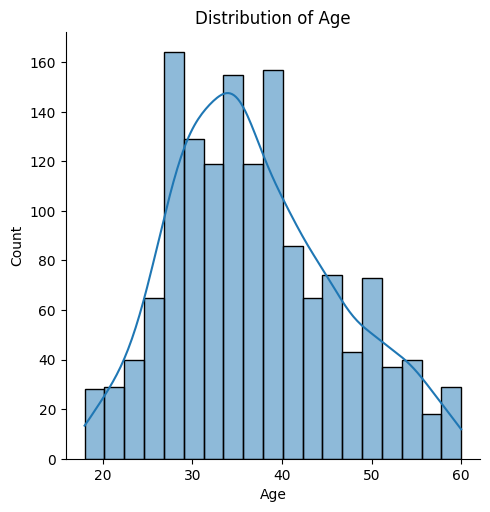

In [3]:
# Distribution of Age
sns.displot(data['Age'], kde=True)
plt.title("Distribution of Age")
plt.show()

In [4]:
# Filter data Attrition ="Yes" only
attrition_data = data[data["Attrition"] == "Yes"]

# Calculate count of attrition by department
attrition_by = attrition_data.groupby(["Department"]).size().reset_index(name="Count")
attrition_by

# Create donut chart
fig= go.Figure(
    data= [go.Pie(
        labels = attrition_by["Department"],
        values = attrition_by["Count"],
        hole=0.2,
        marker=dict(
            colors = ['#3CAEA3', '#F6D55C']),
        textposition = "inside"
    )])

# Update layout
fig.update_layout(
    title = "Attrition by Department",
    font= dict(size=16),
    legend = dict(
        orientation="h",
        yanchor ="bottom",
        y=1.02,
        xanchor ="right",
        x=1
    )
)

fig.show()

In [5]:
# Calculate count of attrition by department
attrition_by = attrition_data.groupby(["EducationField"]).size().reset_index(name="Count")
attrition_by

# Create donut chart
fig= go.Figure(
    data= [go.Pie(
        labels = attrition_by["EducationField"],
        values = attrition_by["Count"],
        hole=0.2,
        marker=dict(
            colors = ['#3CAEA3', '#F6D55C']),
        textposition = "inside"
    )])

# Update layout
fig.update_layout(
    title = "Attrition by Educational Field",
    font= dict(size=16),
    legend = dict(
        orientation="h",
        yanchor ="bottom",
        y=1.02,
        xanchor ="right",
        x=1
    )
)

fig.show()

In [6]:
# Calculate count of attrition by department
attrition_by = attrition_data.groupby(["YearsAtCompany"]).size().reset_index(name="Count")
attrition_by

# Create donut chart
fig= go.Figure(
    data= [go.Pie(
        labels = attrition_by["YearsAtCompany"],
        values = attrition_by["Count"],
        hole=0.2,
        marker=dict(
            colors = ['#3CAEA3', '#F6D55C']),
        textposition = "inside"
    )])

# Update layout
fig.update_layout(
    title = "Attrition by Years At Company",
    font= dict(size=16),
    legend = dict(
        orientation="h",
        yanchor ="bottom",
        y=1.02,
        xanchor ="right",
        x=1
    )
)

fig.show()

In [7]:
# Trying to group the age into 4 or 8 bins to make the above chart more clean
# Need 

# Calculate count of attrition by department
year_group= pd.cut(attrition_data['YearsAtCompany'], bins=8).reset_index(name="Count")
attrition_by = pd.DataFrame(year_group.groupby("Count").size()).reset_index()
attrition_by.columns = ['Years Group', 'Count']
attrition_by['Years Group'] = attrition_by['Years Group'].astype('string')
attrition_by.info()
# labels = ['0 to 10 years', '> 10 to 20 years', '> 20 to 30 years', '> 30 to 40 years']
# Create donut chart
fig= go.Figure(
    data= [go.Pie(
        labels = attrition_by['Years Group'],
        values = attrition_by["Count"],
        hole=0.2,
        marker=dict(
            colors = ['#3CAEA3', '#F6D55C']),
        textposition = "inside"
    )])

# Update layout
fig.update_layout(
    title = "Attrition by Years At Company",
    font= dict(size=16),
    legend = dict(
        orientation="h",
        yanchor ="bottom",
        y=1.02,
        xanchor ="right",
        x=1
    )
)

fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Years Group  8 non-null      string
 1   Count        8 non-null      int64 
dtypes: int64(1), string(1)
memory usage: 256.0 bytes


In [8]:
fig = px.scatter(
    data,
    x="Age",
    y="MonthlyIncome",
    color="Attrition",
    trendline="ols"
)

fig.update_layout(title="Age vs Monthly Income by Attrition")
fig.show()

# Predict model with Random Forest

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

list = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for att in list:
    data[att] = le.fit_transform(data[att])

In [12]:
correlation = data.corr()
print(correlation["Attrition"].sort_values(ascending=False))

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [13]:
data['SatisfactionScore'] = data['EnvironmentSatisfaction'] + data['JobSatisfaction'] + data['RelationshipSatisfaction']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

# Evaluate model's performance
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy: ", accuracy)

Accuracy:  0.8344671201814059
